<a href="https://colab.research.google.com/github/srinu-p-p/AIML_Project_and_Labs/blob/main/AIML_Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


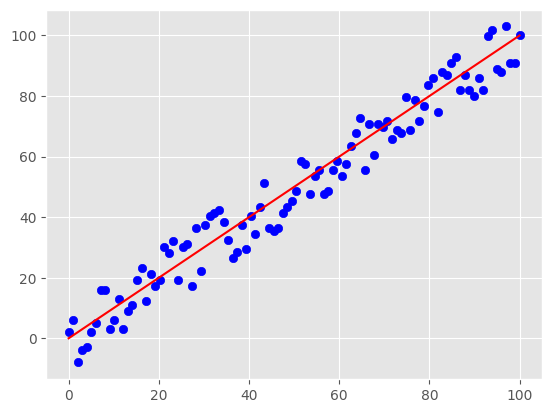

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

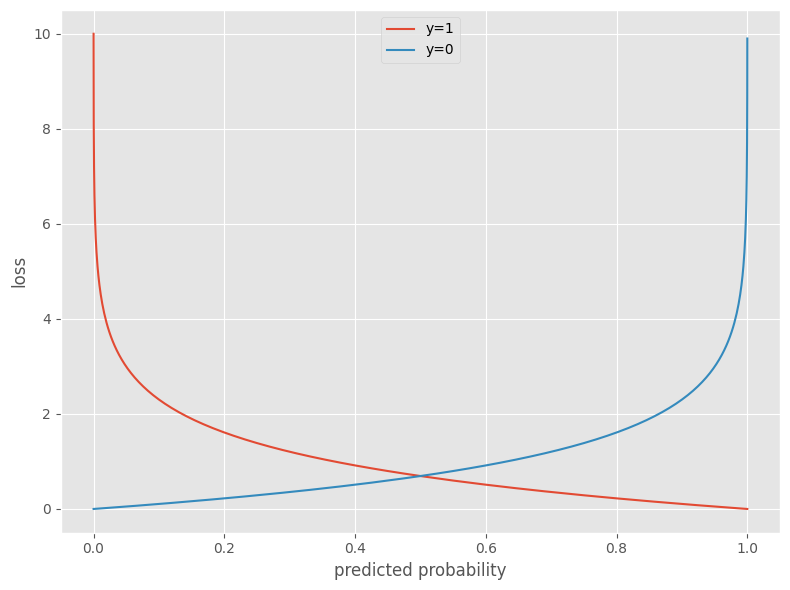

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

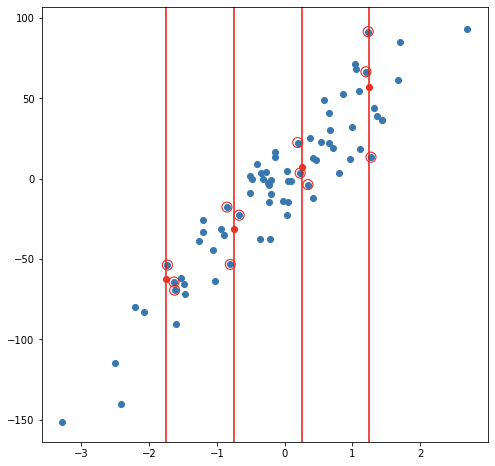

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

<ipython-input-8-16fc6f082614>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
<ipython-input-8-16fc6f082614>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

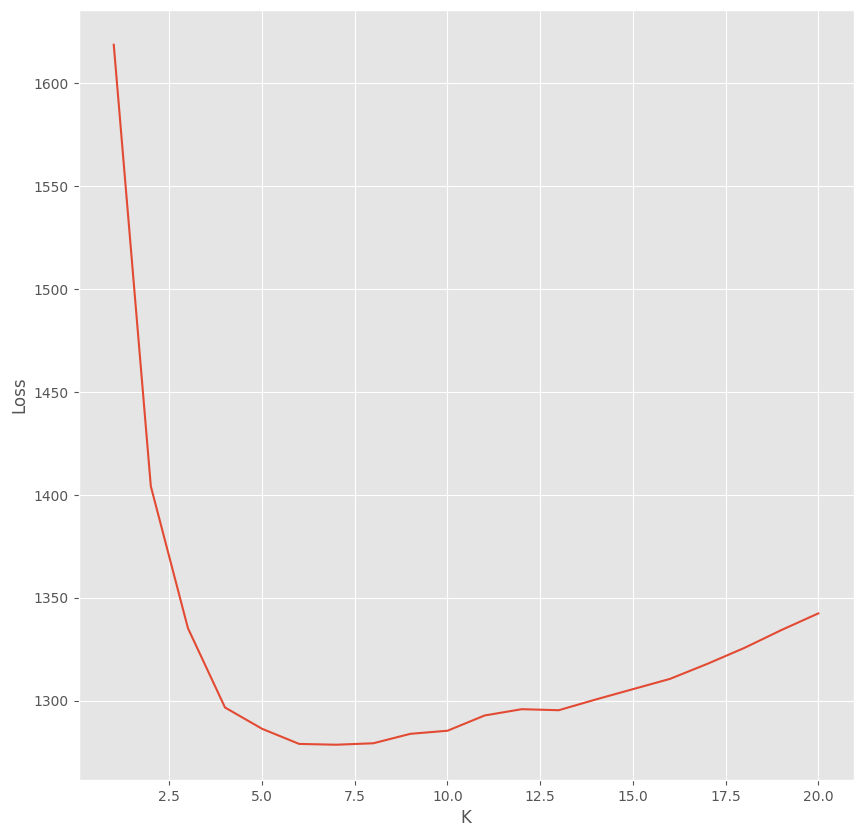

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

1.


Training with loss function: mean_squared_error


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.3480, Test MAE: 0.3857

Training with loss function: mean_absolute_error
Test Loss: 0.3598, Test MAE: 0.3598

Training with loss function: huber
Test Loss: 0.1274, Test MAE: 0.3668

Training with loss function: log_cosh
Test Loss: 0.1188, Test MAE: 0.3740


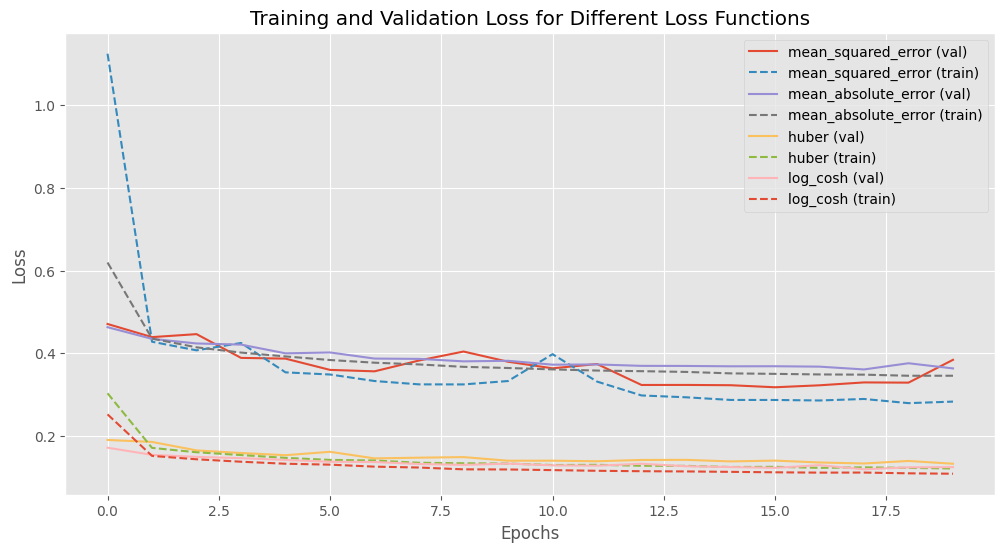


Final Test Metrics:
mean_squared_error: Test Loss = 0.3480, Test MAE = 0.3857
mean_absolute_error: Test Loss = 0.3598, Test MAE = 0.3598
huber: Test Loss = 0.1274, Test MAE = 0.3668
log_cosh: Test Loss = 0.1188, Test MAE = 0.3740
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


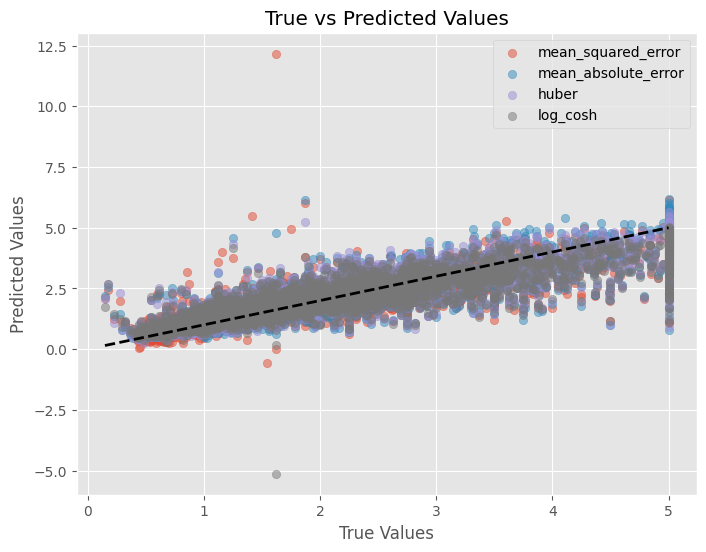

In [13]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define a function to build the model
def build_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)  # Single output for regression
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['mae'])
    return model

# Step 3: Train models with different loss functions
loss_functions = ['mean_squared_error', 'mean_absolute_error', 'huber', 'log_cosh']
results = {}

for loss in loss_functions:
    print(f"\nTraining with loss function: {loss}")
    model = build_model(loss)
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
    results[loss] = {
        "model": model,
        "history": history,
        "test_metrics": model.evaluate(X_test, y_test, verbose=0)
    }
    print(f"Test Loss: {results[loss]['test_metrics'][0]:.4f}, Test MAE: {results[loss]['test_metrics'][1]:.4f}")

# Step 4: Plot training and validation loss curves
plt.figure(figsize=(12, 6))
for loss in loss_functions:
    history = results[loss]["history"]
    plt.plot(history.history['val_loss'], label=f'{loss} (val)')
    plt.plot(history.history['loss'], '--', label=f'{loss} (train)')
plt.title('Training and Validation Loss for Different Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Print final test metrics for comparison
print("\nFinal Test Metrics:")
for loss, result in results.items():
    metrics = result['test_metrics']
    print(f"{loss}: Test Loss = {metrics[0]:.4f}, Test MAE = {metrics[1]:.4f}")

# Step 6: Optional - Visualize predictions
plt.figure(figsize=(8, 6))
for loss in loss_functions:
    model = results[loss]["model"]
    predictions = model.predict(X_test)
    plt.scatter(y_test, predictions, alpha=0.5, label=loss)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


2.
Additional Regression Loss Functions
Smooth L1 Loss (Huber Smooth Approximation):

A variant of the Huber Loss with a smooth transition around the threshold.
Formula:
𝐿
(
𝑦
,
𝑦
^
)
=
{
0.5
(
𝑦
−
𝑦
^
)
2
if
∣
𝑦
−
𝑦
^
∣
≤
1
∣
𝑦
−
𝑦
^
∣
−
0.5
if
∣
𝑦
−
𝑦
^
∣
>
1
L(y,
y
^
​
 )={
0.5(y−
y
^
​
 )
2

∣y−
y
^
​
 ∣−0.5
​
  
if ∣y−
y
^
​
 ∣≤1
if ∣y−
y
^
​
 ∣>1
​

Use Case: Balances robustness to outliers and sensitivity to small errors. Suitable when noise is present in the data.
Pseudo-Huber Loss:

A smooth alternative to Huber Loss that avoids non-differentiability.
Formula:
𝐿
(
𝑦
,
𝑦
^
)
=
𝛿
2
(
1
+
(
𝑦
−
𝑦
^
𝛿
)
2
−
1
)
L(y,
y
^
​
 )=δ
2
  
​
  
1+(
δ
y−
y
^
​

​
 )
2

​
 −1
​

Use Case: Similar to Huber Loss but differentiable everywhere, making optimization easier.
Quantile Loss:

For quantile regression to predict specific quantiles.
Formula:
𝐿
(
𝑦
,
𝑦
^
)
=
{
𝜏
(
𝑦
−
𝑦
^
)
if
𝑦
−
𝑦
^
>
0
(
1
−
𝜏
)
(
𝑦
^
−
𝑦
)
if
𝑦
−
𝑦
^
≤
0
L(y,
y
^
​
 )={
τ(y−
y
^
​
 )
(1−τ)(
y
^
​
 −y)
​
  
if y−
y
^
​
 >0
if y−
y
^
​
 ≤0
​

Use Case: Predicting percentiles or confidence intervals in data (e.g., weather forecasting or stock market predictions).
Wasserstein Loss (Earth Mover’s Distance):

Measures the distance between two distributions.
Use Case: Suitable for tasks where the outputs are distributions, such as probabilistic regression.
Epsilon-Insensitive Loss (used in Support Vector Regression):

Ignores errors within a threshold (
𝜖
ϵ).
Formula:
𝐿
(
𝑦
,
𝑦
^
)
=
max
⁡
(
0
,
∣
𝑦
−
𝑦
^
∣
−
𝜖
)
L(y,
y
^
​
 )=max(0,∣y−
y
^
​
 ∣−ϵ)
Use Case: Ensures the model only focuses on significant errors, useful in Support Vector Machines (SVMs).



Training with loss function: MSE


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.2998, Test MAE: 0.3755

Training with loss function: MAE
Test Loss: 0.3580, Test MAE: 0.3580

Training with loss function: Huber
Test Loss: 0.1288, Test MAE: 0.3719

Training with loss function: Log-Cosh
Test Loss: 0.1157, Test MAE: 0.3618

Training with loss function: Pseudo-Huber
Test Loss: 0.1114, Test MAE: 0.3684

Training with loss function: Quantile (0.5)
Test Loss: 0.1784, Test MAE: 0.3569


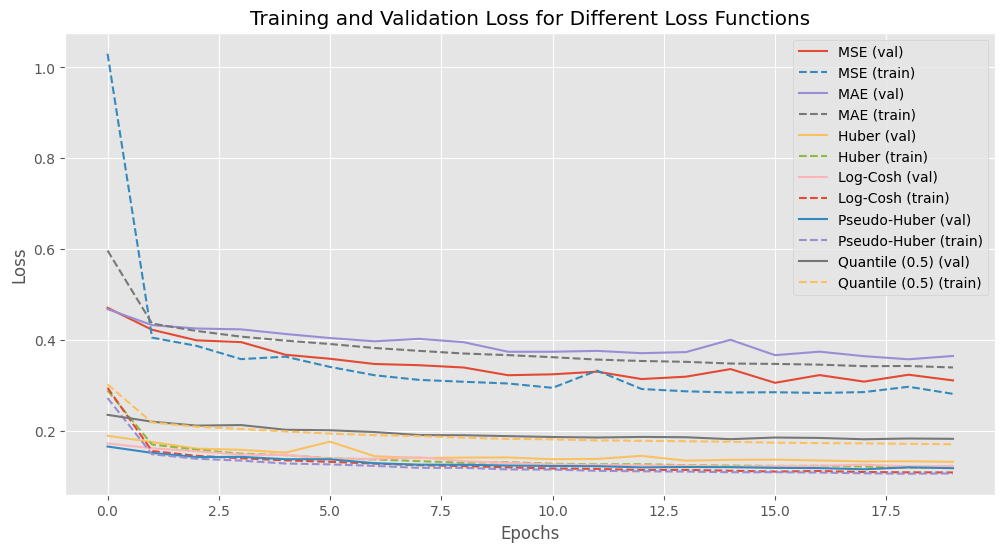


Final Test Metrics:
MSE: Test Loss = 0.2998, Test MAE = 0.3755
MAE: Test Loss = 0.3580, Test MAE = 0.3580
Huber: Test Loss = 0.1288, Test MAE = 0.3719
Log-Cosh: Test Loss = 0.1157, Test MAE = 0.3618
Pseudo-Huber: Test Loss = 0.1114, Test MAE = 0.3684
Quantile (0.5): Test Loss = 0.1784, Test MAE = 0.3569


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom loss functions
def pseudo_huber_loss(delta=1.0):
    def loss(y_true, y_pred):
        residual = y_true - y_pred
        return tf.reduce_mean(delta**2 * (tf.sqrt(1 + (residual / delta)**2) - 1))
    return loss

def quantile_loss(tau):
    def loss(y_true, y_pred):
        residual = y_true - y_pred
        return tf.reduce_mean(tf.maximum(tau * residual, (tau - 1) * residual))
    return loss

# Build model
def build_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)  # Single output
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['mae'])
    return model

# Train models with various loss functions
loss_functions = {
    'MSE': 'mean_squared_error',
    'MAE': 'mean_absolute_error',
    'Huber': 'huber',
    'Log-Cosh': 'log_cosh',
    'Pseudo-Huber': pseudo_huber_loss(delta=1.0),
    'Quantile (0.5)': quantile_loss(0.5),
}

results = {}

for loss_name, loss_fn in loss_functions.items():
    print(f"\nTraining with loss function: {loss_name}")
    model = build_model(loss_fn)
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
    results[loss_name] = {
        "model": model,
        "history": history,
        "test_metrics": model.evaluate(X_test, y_test, verbose=0)
    }
    print(f"Test Loss: {results[loss_name]['test_metrics'][0]:.4f}, Test MAE: {results[loss_name]['test_metrics'][1]:.4f}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
for loss_name, result in results.items():
    history = result['history']
    plt.plot(history.history['val_loss'], label=f'{loss_name} (val)')
    plt.plot(history.history['loss'], '--', label=f'{loss_name} (train)')
plt.title('Training and Validation Loss for Different Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print final test metrics
print("\nFinal Test Metrics:")
for loss_name, result in results.items():
    metrics = result['test_metrics']
    print(f"{loss_name}: Test Loss = {metrics[0]:.4f}, Test MAE = {metrics[1]:.4f}")


3.




Evaluating KNN on California dataset
Best K (based on MAE): 13, MAE: 0.4373
Best K (based on MSE): 13, MSE: 0.4163


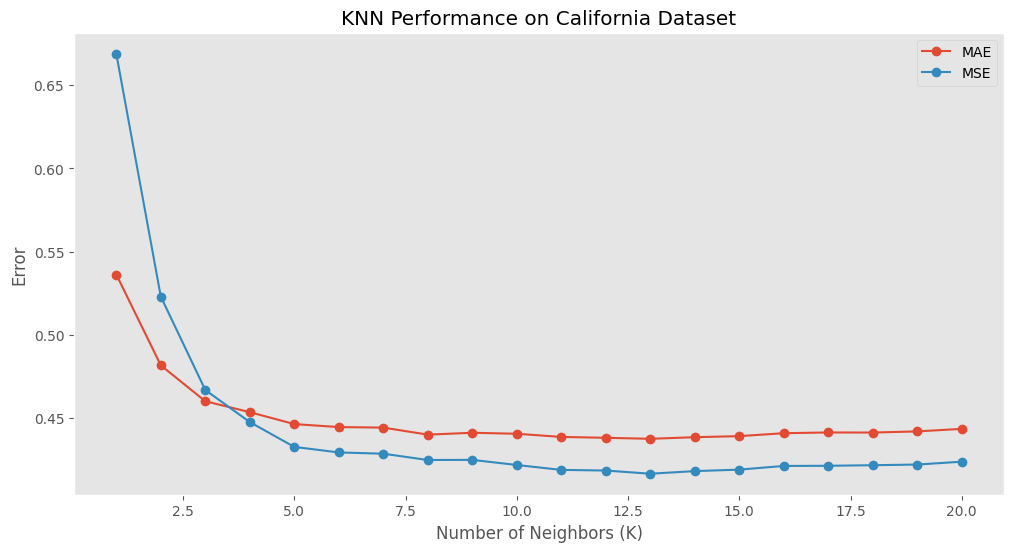


Evaluating KNN on Diabetes dataset
Best K (based on MAE): 6, MAE: 42.0337
Best K (based on MSE): 6, MSE: 2891.3390


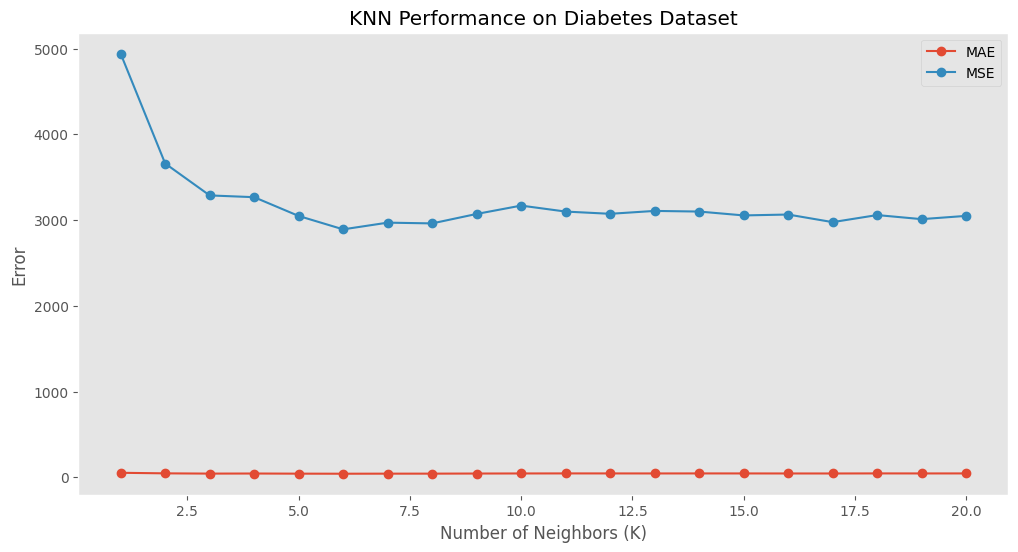

In [15]:
import numpy as np
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
def load_and_preprocess_data(dataset_name):
    if dataset_name == "california":
        data = fetch_california_housing()
    elif dataset_name == "diabetes":
        data = load_diabetes()
    else:
        raise ValueError("Unknown dataset")

    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Train KNN regressor for different K values and evaluate performance
def evaluate_knn(X_train, X_test, y_train, y_test, max_k=20):
    results = {"k": [], "MAE": [], "MSE": []}

    for k in range(1, max_k + 1):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results["k"].append(k)
        results["MAE"].append(mae)
        results["MSE"].append(mse)

    return results

# Plot results
def plot_results(results, dataset_name):
    plt.figure(figsize=(12, 6))
    plt.plot(results["k"], results["MAE"], marker='o', label="MAE")
    plt.plot(results["k"], results["MSE"], marker='o', label="MSE")
    plt.title(f"KNN Performance on {dataset_name.capitalize()} Dataset")
    plt.xlabel("Number of Neighbors (K)")
    plt.ylabel("Error")
    plt.legend()
    plt.grid()
    plt.show()

# Main execution
datasets = ["california", "diabetes"]
for dataset_name in datasets:
    print(f"\nEvaluating KNN on {dataset_name.capitalize()} dataset")
    X_train, X_test, y_train, y_test = load_and_preprocess_data(dataset_name)
    results = evaluate_knn(X_train, X_test, y_train, y_test, max_k=20)

    # Find the best K
    best_k_mae = results["k"][np.argmin(results["MAE"])]
    best_k_mse = results["k"][np.argmin(results["MSE"])]
    print(f"Best K (based on MAE): {best_k_mae}, MAE: {min(results['MAE']):.4f}")
    print(f"Best K (based on MSE): {best_k_mse}, MSE: {min(results['MSE']):.4f}")

    # Plot performance
    plot_results(results, dataset_name)


4.

In [16]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and preprocess data
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluate KNN for K=1 and K=n_train
k_values = [1, len(X_train)]
results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[k] = {"MAE": mae, "MSE": mse}
    print(f"K = {k}: MAE = {mae:.4f}, MSE = {mse:.4f}")

# Analyze predictions for K=n_train
if len(X_train) in results:
    print("\nExample Predictions for K = n_train:")
    print(f"True Values: {y_test[:5]}")
    print(f"Predicted Values: {knn.predict(X_test[:5])}")


K = 1: MAE = 0.5362, MSE = 0.6690
K = 16512: MAE = 0.9061, MSE = 1.3107

Example Predictions for K = n_train:
True Values: [0.477   0.458   5.00001 2.186   2.78   ]
Predicted Values: [2.07194694 2.07194694 2.07194694 2.07194694 2.07194694]
